Le 21 juillet 2019, la dose efficace de radioactivité mesurée à Paris est de 0.042 µSv/h. Ci-dessous, l’historique sur les derniers jours.


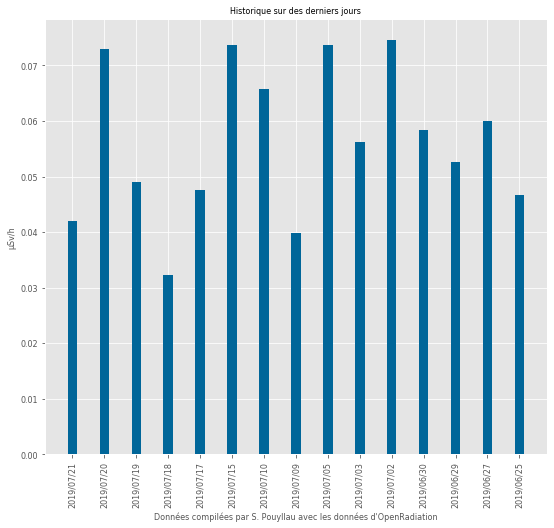

In [7]:
import matplotlib.pyplot as plt
import requests
import json
import locale
import tweepy
import yaml
from datetime import datetime

# What's the day today ?
todayYMD = datetime.today().strftime("%Y-%m-%d")
#todayYMD = "2019-07-15"
locale.setlocale(locale.LC_ALL,'')
todayFR = datetime.today().strftime("%d %B %Y")

# Resquest OpenRadiation API
def initApiOpenRadiation():
    with open("Tweet2Rad-.yml", "r") as conf:
        t2r = yaml.safe_load(conf)
    url=t2r["OR_API"]
    params = dict(
        apiKey=t2r["OR_APIKEY"],
        response=t2r["OR_API_TYPERESPONSE"],
        userId=t2r["OR_API_USERID"],
        tag=t2r["OR_API_TAG"],
        maxNumber=t2r["OR_API_MAXNUMBER"]
    )
    return requests.get(url=url, params=params)
    
# Load OpenRadiation data
resp = initApiOpenRadiation()
binary = resp.content
data = json.loads(binary)

# Initiation of Tweepy with Twitter account with Tweet2Rad.yml values
def initTwitter():
    with open("Tweet2Rad-.yml", "r") as conf:
        t2r = yaml.safe_load(conf)
    auth = tweepy.OAuthHandler(t2r["CONSUMER_KEY"], t2r["CONSUMER_SECRET"])
    auth.set_access_token(t2r["ACCESS_KEY"], t2r["ACCESS_SECRET"])
    return tweepy.API(auth)

# Graph of last days
for i in data["data"]:
    date = datetime.strptime(i["startTime"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y/%m/%d')
    x = date
    y = i["value"]
    plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (9,8)
    plt.title("Historique sur des derniers jours", fontsize=8)
    plt.ylabel("µSv/h", fontsize=8)
    plt.xlabel("Données compilées par S. Pouyllau avec les données d'OpenRadiation", fontsize=8)
    plt.xticks(rotation = 90, ha='center', fontsize=8)
    plt.yticks(fontsize=8)
    plt.bar(x,y, color="#006699", width=0.3)
    plt.savefig("t2r.png")
    plt.close

# Let's go !
for element in data['data']: 
    with open("Tweet2Rad-.yml", "r") as conf:
        t2r = yaml.safe_load(conf)
    city = t2r["CITY"]
    msv = round(element['value'],3)
    #ville = "#Paris"
    date = datetime.strptime(element["startTime"], "%Y-%m-%dT%H:%M:%S.%fZ").strftime('%Y-%m-%d')
    
    if todayYMD == date:
        # Tweet text
        tweet = "Le " + todayFR + ", la dose efficace de radioactivité mesurée à "+city+" est de " + str(msv) + " µSv/h. Ci-dessous, l’historique sur les derniers jours."
        # Twitter authentification 
        api = initTwitter()
        #
        # Push the tweet + graph (and a local print)
        # !!! Uncomment the line below before launch
        #
        #api.update_with_media("t2r.png", status=tweet)
        
        # Local print (for logs)
        print(tweet)